In [6]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib as maplotlib
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(15,5)

In [8]:
# Load and preview dataset

raw_df = pd.read_csv('../Resources/CO2_Australia.csv', index_col='year', parse_dates=True)
raw_df

,co2_per_capita
year,
1860-01-01,0.216
1861-01-01,0.377
1862-01-01,0.253
1863-01-01,0.276
1864-01-01,0.180
...,...
2016-01-01,17.143
2017-01-01,16.870
2018-01-01,16.708


In [9]:
# Prepare for Prophet
# Reset index

df = raw_df.reset_index()
df.head()

,year,co2_per_capita
0,1860-01-01,0.216
1,1861-01-01,0.377
2,1862-01-01,0.253
3,1863-01-01,0.276
4,1864-01-01,0.180


In [10]:
# Rename 'year' and 'co2_per_capita' to 'ds' and 'y', respectively

df = df.rename(columns={'year':'ds', 'co2_per_capita':'y'})
df.head()

,ds,y
0,1860-01-01,0.216
1,1861-01-01,0.377
2,1862-01-01,0.253
3,1863-01-01,0.276
4,1864-01-01,0.180


<AxesSubplot:xlabel='ds'>

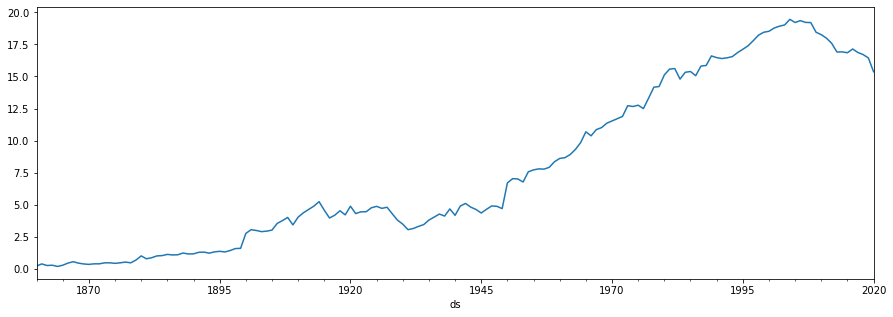

In [11]:
# Set index and preview plot

df.set_index('ds').y.plot()

In [12]:
# Determine if a trend exist via log-transform

df['y'] = np.log(df['y'])
df.tail()

,ds,y
156,2016-01-01,2.841590
157,2017-01-01,2.825537
158,2018-01-01,2.815888
159,2019-01-01,2.800143
160,2020-01-01,2.732287


<AxesSubplot:xlabel='ds'>

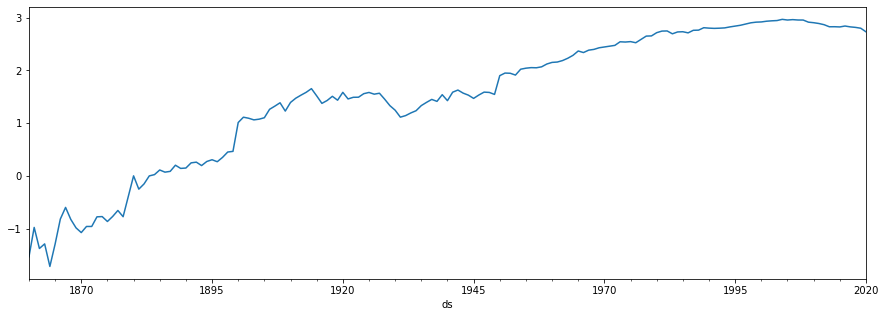

In [13]:
# Set 'ds' as index

df.set_index('ds').y.plot()

In [14]:
# Create model

model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df);

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [15]:
# Add future dates to model (5 years / 60 months)

future = model.make_future_dataframe(periods=10, freq = 'y')
future.tail()

,ds
166,2025-12-31
167,2026-12-31
168,2027-12-31
169,2028-12-31
170,2029-12-31


In [16]:
# Forecast and run through Prophet model

forecast = model.predict(future)
forecast.tail()

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
166,2025-12-31,2.810947,2.985830,3.490037,2.805312,2.816444,0.426749,0.426749,0.426749,-0.225839,...,-0.013403,-0.013403,-0.013403,0.665991,0.665991,0.665991,0.0,0.0,0.0,3.237696
167,2026-12-31,2.824641,3.045391,3.578880,2.817292,2.831758,0.492213,0.492213,0.492213,-0.225839,...,0.032525,0.032525,0.032525,0.685527,0.685527,0.685527,0.0,0.0,0.0,3.316854
168,2027-12-31,2.838335,3.041885,3.550591,2.829101,2.847422,0.440508,0.440508,0.440508,-0.225839,...,-0.037603,-0.037603,-0.037603,0.703950,0.703950,0.703950,0.0,0.0,0.0,3.278843
169,2028-12-31,2.852066,2.977586,3.510657,2.841044,2.864035,0.401197,0.401197,0.401197,-0.225839,...,-0.018327,-0.018327,-0.018327,0.645363,0.645363,0.645363,0.0,0.0,0.0,3.253263
170,2029-12-31,2.865760,3.070436,3.579813,2.852638,2.879883,0.460677,0.460677,0.460677,-0.225839,...,0.020525,0.020525,0.020525,0.665991,0.665991,0.665991,0.0,0.0,0.0,3.326438


In [17]:
# Drop surplus columns

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
166,2025-12-31,3.237696,2.985830,3.490037
167,2026-12-31,3.316854,3.045391,3.578880
168,2027-12-31,3.278843,3.041885,3.550591
169,2028-12-31,3.253263,2.977586,3.510657
170,2029-12-31,3.326438,3.070436,3.579813


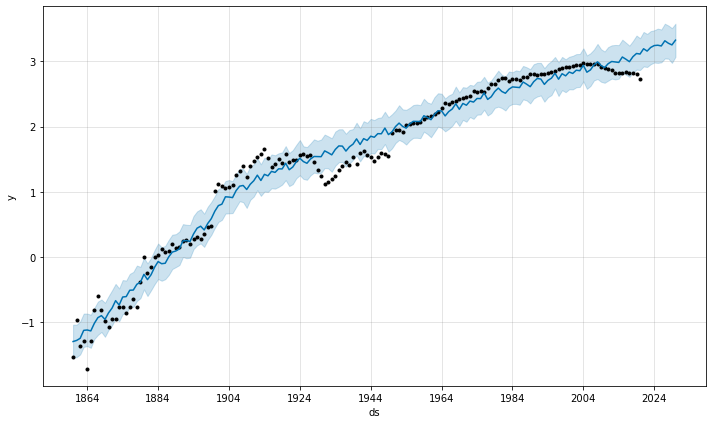

In [18]:
# Plot forecast

model.plot(forecast);

In [19]:
# Finalise visualisation
# Set 'ds' as index for both dataframes

df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [20]:
# Combine both dataframes

vis_df = raw_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df.head()

,co2_per_capita,yhat,yhat_lower,yhat_upper
1860-01-01,0.216,-1.299779,-1.549498,-1.040768
1861-01-01,0.377,-1.283060,-1.539546,-1.041064
1862-01-01,0.253,-1.250858,-1.498631,-0.992245
1863-01-01,0.276,-1.128411,-1.382108,-0.870447
1864-01-01,0.180,-1.122912,-1.370321,-0.870893


In [21]:
# Rescale columns to get same scale

vis_df['yhat_rescaled'] = np.exp(vis_df['yhat'])
vis_df.head()

,co2_per_capita,yhat,yhat_lower,yhat_upper,yhat_rescaled
1860-01-01,0.216,-1.299779,-1.549498,-1.040768,0.272592
1861-01-01,0.377,-1.283060,-1.539546,-1.041064,0.277188
1862-01-01,0.253,-1.250858,-1.498631,-0.992245,0.286259
1863-01-01,0.276,-1.128411,-1.382108,-0.870447,0.323547
1864-01-01,0.180,-1.122912,-1.370321,-0.870893,0.325331


<AxesSubplot:>

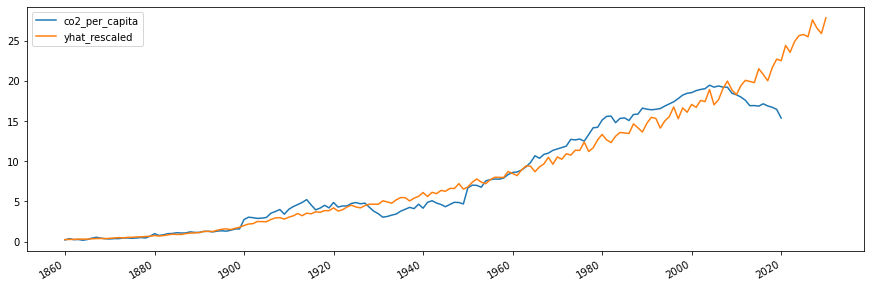

In [22]:
# Plot 'co2_per_capita' and 'yhat_rescaled'

vis_df[['co2_per_capita', 'yhat_rescaled']].plot()

In [23]:
# Ensure crude_oil and model data are connected

raw_df.index = pd.to_datetime(raw_df.index) #make sure our index as a datetime object
connect_date = raw_df.index[-2] #select the 2nd to last date

In [24]:
# Mask forecast data

mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [25]:
# Preview prediction

predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2.728746,2.867638,3.356433,2.728746,2.728746,0.384424,0.384424,0.384424,-0.225839,-0.225839,...,-0.013403,-0.013403,-0.013403,0.623666,0.623666,0.623666,0.0,0.0,0.0,3.113170
2020-12-31,2.742440,2.923076,3.452463,2.742440,2.742440,0.452049,0.452049,0.452049,-0.225839,-0.225839,...,0.032525,0.032525,0.032525,0.645363,0.645363,0.645363,0.0,0.0,0.0,3.194489
2021-12-31,2.756134,2.914152,3.421871,2.755680,2.756166,0.402549,0.402549,0.402549,-0.225839,-0.225839,...,-0.037603,-0.037603,-0.037603,0.665991,0.665991,0.665991,0.0,0.0,0.0,3.158683
2022-12-31,2.769828,2.956481,3.465137,2.768377,2.770606,0.444199,0.444199,0.444199,-0.225839,-0.225839,...,-0.015490,-0.015490,-0.015490,0.685527,0.685527,0.685527,0.0,0.0,0.0,3.214027
2023-12-31,2.783522,2.983339,3.478100,2.780916,2.785491,0.459784,0.459784,0.459784,-0.225839,-0.225839,...,-0.018327,-0.018327,-0.018327,0.703950,0.703950,0.703950,0.0,0.0,0.0,3.243306


In [26]:
# Create updated dataframe

vis_df = raw_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df['yhat_scaled']=np.exp(vis_df['yhat'])

In [27]:
# Preview head

vis_df.head()

,co2_per_capita,yhat,yhat_lower,yhat_upper,yhat_scaled
1860-01-01,0.216,NaN,NaN,NaN,NaN
1861-01-01,0.377,NaN,NaN,NaN,NaN
1862-01-01,0.253,NaN,NaN,NaN,NaN
1863-01-01,0.276,NaN,NaN,NaN,NaN
1864-01-01,0.180,NaN,NaN,NaN,NaN


In [28]:
# Preview tail

vis_df.tail()

,co2_per_capita,yhat,yhat_lower,yhat_upper,yhat_scaled
2025-12-31,NaN,3.237696,2.985830,3.490037,25.474965
2026-12-31,NaN,3.316854,3.045391,3.578880,27.573479
2027-12-31,NaN,3.278843,3.041885,3.550591,26.545045
2028-12-31,NaN,3.253263,2.977586,3.510657,25.874639
2029-12-31,NaN,3.326438,3.070436,3.579813,27.838991


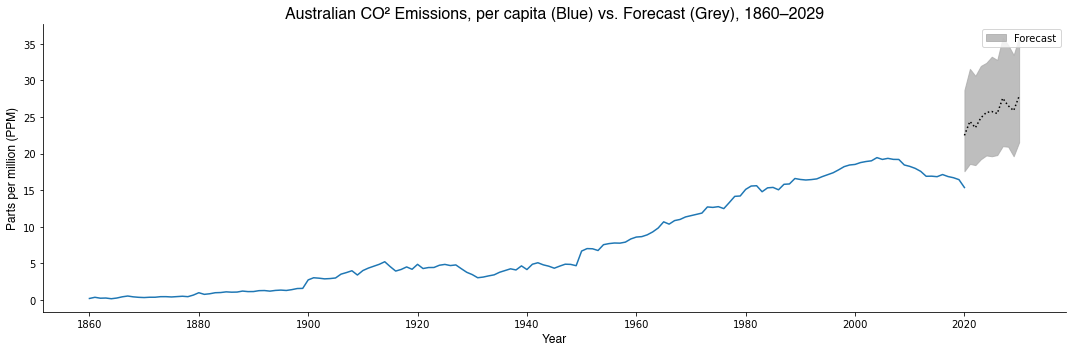

In [34]:
# Plot final visualisation

# Plot
fig, ax1 = plt.subplots()
ax1.plot(vis_df.co2_per_capita)
ax1.plot(vis_df.yhat_scaled, color='black', linestyle=':')

# Fill
ax1.fill_between(vis_df.index, np.exp(vis_df['yhat_upper']), np.exp(vis_df['yhat_lower']), alpha=0.75, 
                 color='darkgray', label = 'Forecast')

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Labels
ax1.set_title('Australian CO² Emissions, per capita (Blue) vs. Forecast (Grey), 1860–2029', fontdict = font_1)
ax1.set_ylabel('Parts per million (PPM)', fontdict = font_2)
ax1.set_xlabel('Year', fontdict = font_2)

# Legend
plt.legend(title='', loc='upper right', ncol=1)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/final-project/Images/co2_emissions_forecast.png", 
            transparent=False, dpi=300)
plt.show()